<a href="https://colab.research.google.com/github/roundlifemin/ai_sommelier_app/blob/master/611_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EA%B5%B0%EC%A7%91%ED%99%94_k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 군집화(Clustering)  
군집화는 **비지도 학습(Unsupervised Learning)**의 일종으로, 데이터의 라벨 정보 없이 유사한 성질을 가진 데이터끼리 묶는 방법이다.

| 항목      | 설명                                         |
| ------- | ------------------------------------------ |
| 학습 방식   | 라벨이 없는 데이터를 기반으로 학습 (비지도 학습)               |
| 목적      | 유사한 데이터끼리 묶어서 그룹을 형성                       |
| 주요 알고리즘 | K-Means, DBSCAN, Hierarchical Clustering 등 |
| 활용 분야   |  고객 분류, 이미지 분석, 문서 분류 , 이상치 탐지 등            |


# 2. 군집화 알고리즘

| 알고리즘                   | 주요 개념    | 처리 과정                                                                                       | 장점                       | 단점                       |
| ---------------------- | -------- | ------------------------------------------------------------------------------------------- | ------------------------ | ------------------------ |
| **KMeans**             | 중심 기반    | ① 군집 수(K) 설정<br>② 초기 중심 선택<br>③ 샘플 할당<br>④ 중심 업데이트<br>⑤ 수렴 시 종료                             | 빠름, 대규모 데이터 적합           | 초기 중심 민감, 비선형 구조 미흡      |
| **평균 이동 (Mean Shift)** | 모드 탐색 기반 | ① 각 샘플을 중심으로 커널 밀도 계산<br>② 밀도 높은 방향으로 중심 이동<br>③ 수렴 시 모드(peak) 판단<br>④ 가까운 모드들 병합하여 군집 형성   | 군집 수 자동 결정, 복잡한 구조 탐지 가능 | 계산 비용 큼, 고차원 데이터에서 느림    |
| **GMM**                | 확률 기반    | ① 군집 수(K) 설정<br>② 초기 파라미터 설정<br>③ E-step: 소속 확률 계산<br>④ M-step: 가우시안 파라미터 업데이트<br>⑤ 수렴 시 종료 | 소속 확률 제공, 타원형 군집 탐지 가능   | 초기값 민감, 수렴 느릴 수 있음, K 필요 |
| **DBSCAN**             | 밀도 기반    | ① 반경 ε 설정<br>② 이웃 개수 ≥ MinPts 확인<br>③ 핵심점 선정<br>④ 이웃 연결 확장<br>⑤ 잡음 구분                       | 이상치 강건, 군집 수 자동 결정 가능    | 희소데이터 부적합, 파라미터 민감       |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

# 데이터 불러오기
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 정답 라벨 (평가용)

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시각화를 위한 차원 축소 (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)


(569, 2)


## 2_1. KMeans 클러스터링
- K: 군집의 수 (사용자가 지정)
- 각 데이터를 K개의 중심점(Centroid)에 할당하고, 반복적으로 중심을 업데이트하면서 군집을 형성
- 거리 기반 알고리즘 (보통 유클리드 거리 사용)

| 옵션                 | 기본값           | 설명                                                                                 |
| ------------------ | ------------- | ---------------------------------------------------------------------------------- |
| **`n_clusters`**   | 8             | 생성할 군집(클러스터)의 수 `K`를 지정합니다.                                                        |
| **`init`**         | `'k-means++'` | 초기 중심점 선택 방법<br> `'k-means++'`: 좋은 성능의 기본값<br> `'random'`: 무작위 선택<br> 또는 사용자 지정 배열 |
| **`n_init`**       | 10            | 서로 다른 초기 중심점 설정으로 몇 번 알고리즘을 실행할지 지정. 최적의 결과 중 하나를 선택                               |
| **`max_iter`**     | 300           | 단일 실행에서 군집 중심을 업데이트할 최대 반복 횟수                                                      |
| **`tol`**          | 1e-4          | 수렴 판정 기준인 중심 변화 허용 오차 (작을수록 더 정확하게 수렴)                                             |
| **`random_state`** | `None`        | 초기 중심점 선택에 대한 랜덤 시드. 결과 재현에 사용                                                     |
| **`algorithm`**    | `'lloyd'`     | 사용 알고리즘 종류 <br> `'lloyd'`: 기본 알고리즘 <br> `'elkan'`: 유클리디안 거리에서 더 빠름 (고차원에서는 느림)     |
| **`verbose`**      | 0             | 학습 과정의 로그를 출력할지 여부 (1이면 출력됨)                                                       |
| **`copy_x`**       | `True`        | 입력 데이터를 복사해서 사용하는지 여부 (False면 원본 데이터에 영향 가능)                                       |

[init 파라미터]
- init 파라미터는 **초기 중심점(centroid)**을 어떻게 선택할지를 결정

| 값             | 설명                                                                            |
| ------------- | ----------------------------------------------------------------------------- |
| `'k-means++'` | **기본값**. 군집 간 거리를 고려해 초기 중심을 뽑아 **빠르고 안정적인 수렴**을 유도함. 거의 모든 경우에 추천됨.          |
| `'random'`    | **완전히 무작위**로 중심을 선택. 성능이 불안정할 수 있으며 `n_init` 값을 높게 설정해 여러 번 실행하는 것이 필요함.      |
| 배열 (ndarray)  | 사용자 정의 초기 중심값 배열을 직접 지정할 수 있음. 형식: `(n_clusters, n_features)` 형태의 `numpy` 배열. |
| `callable`    | 함수 형태로 직접 초기화 로직을 제공할 수도 있음 (고급 사용 시).                                        |

- k-means++ 사용 (기본)
```
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
```

- random 사용
```
kmeans = KMeans(n_clusters=3, init='random', random_state=42)
kmeans.fit(X_scaled)
```
> ※ random은 수렴이 느리거나 나쁜 로컬 최솟값에 빠질 수 있으므로 보통 n_init=10~20 이상을 권장한다.

- 사용자 지정 중심점 배열
```
# 사용자 지정 중심점 배열
import numpy as np
# 예시로 첫 3개의 데이터를 초기 중심으로 지정
init_centers = X_scaled[:3]  # shape: (3, n_features)
kmeans = KMeans(n_clusters=3, init=init_centers, n_init=1)
kmeans.fit(X_scaled)
```
> ※ 이 경우 n_init=1로 반드시 설정해야 한다. (init이 배열일 경우 자동 반복 초기화 안 됨)


[algorithm 파라미터]  
1) 'lloyd' 알고리즘 (기본)  
① 각 포인트를 가장 가까운 중심에 할당  
② 각 군집의 평균으로 중심을 재계산  
③ 중심이 더 이상 이동하지 않으면 종료  
  - 계산 단순하고 모든 거리 계산 수행
  - 모든 거리 계산이 필요 → 느릴 수 있음  

2) 'elkan' 알고리즘  
① 삼각 부등식을 이용하여 불필요한 거리 계산을 건너뜀    
② 가능한 경우 계산을 skip하고 중심 업데이트  
③ 거리 계산 수를 줄여 연산 속도 향상  
  - 단, 내부 구현 복잡 → 고차원 공간에서는 오히려 느릴 수 있음


  | 항목        | `'lloyd'` | `'elkan'`            |
| --------- | --------- | -------------------- |
| 속도        | 일반적으로 느림  | 저차원 + 유클리디안 거리일 때 빠름 |
| 거리 계산 최적화 | 없음        | 있음 (삼각 부등식)          |
| 지원 거리     | 모든 거리     | **유클리디안만 지원**        |
| 고차원 성능    | 적절        | 감소 가능                |
| 병렬 처리     | 지원        | 제한적                  |



※ 추천기준

| 상황                 | 추천 알고리즘               |
| ------------------ | --------------------- |
| 일반적인 데이터 (30차원 이하) | `'elkan'` (더 빠를 수 있음) |
| 고차원 데이터 (예: 1000+) | `'lloyd'`             |
| 거리 함수를 커스터마이징할 경우  | `'lloyd'` (기본 옵션 사용)  |
| 정확성 < 빠른 속도가 중요    | `'elkan'`             |


※ elkan과 거리 설정

| 항목       | 설명                                            |
| -------- | --------------------------------------------- |
| 지원 거리    | 오직 **유클리디안 거리**만 지원                           |
| 설정 방법    | `KMeans(..., algorithm='elkan')`으로 지정하면 자동 적용 |
| 다른 거리 사용 | 불가능 (`manhattan`, `cosine` 등은 지원하지 않음)        |


- elkan은 내부 최적화를 위해 삼각 부등식을 사용하므로 유클리디안 거리만 가능

- 만약 다른 거리 척도를 쓰고 싶다면, KMeans가 아니라 sklearn.cluster의 MiniBatchKMeans나 scipy 기반 커스텀 군집화, 또는 DBSCAN, AgglomerativeClustering을 사용하는 것을 고려해야 한다.


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)
print(dir(kmeans))


['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_algorithm', '_build_request_for_signature', '_check_feature_names', '_check_mkl_vcomp', '_check_n_features', '_check_params_vs_input', '_check_test_data', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_init_centroids', '_more_tags', '_n_features_out', '_n_init', '_n_threads', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sk

KMeans 모델을 .fit()으로 학습시킨 후에는 다양한 **속성(attributes)**을 통해 결과를 확인할 수 있다. 이 속성들은 군집화 결과를 이해하고 평가할 때  유용하다.

| 속성명                      | 타입                                        | 설명                                            |
| ------------------------ | ----------------------------------------- | --------------------------------------------- |
| **`.labels_`**           | array, shape = (n\_samples,)              | 각 샘플이 속한 군집 번호 (0부터 시작)                       |
| **`.cluster_centers_`**  | array, shape = (n\_clusters, n\_features) | 각 군집의 중심점 좌표                                  |
| **`.inertia_`**          | float                                     | 전체 샘플이 속한 군집 중심과의 거리 제곱합 (Within-Cluster SSE) |
| **`.n_iter_`**           | int                                       | 수렴할 때까지 반복한 KMeans 알고리즘의 반복 횟수                |
| **`.n_features_in_`**    | int                                       | 입력 피처의 개수 (v1.0 이상)                           |
| **`.feature_names_in_`** | array (옵션)                                | 입력 피처 이름 (`pandas` DataFrame 사용 시 자동 제공)      |


.labels_ : 각 샘플의 군집 번호

In [ ]:
# 첫번째 방법
from collections import Counter
counts = Counter(kmeans.labels_)
print(counts)

# 두번째 방법
unique, counts = np.unique(kmeans.labels_, return_counts=True)
for label, count in zip(unique, counts):
    print(f"클러스터 {label}: {count}개")



Counter({np.int32(0): 381, np.int32(1): 188})
클러스터 0: 381개
클러스터 1: 188개


.cluster_centers_ : 각 군집의 중심 좌표 (표준화된 feature 공간)

In [ ]:
print(kmeans.cluster_centers_.shape)
# → (2, 30)  → 2개 군집, 30개 특성
print(kmeans.cluster_centers_[0])


(2, 30)
[-0.48677585 -0.24278217 -0.50264928 -0.48100231 -0.28970632 -0.50038248
 -0.56494861 -0.57746231 -0.29773585 -0.11313275 -0.42589487 -0.02179192
 -0.4265603  -0.40154836 -0.00606408 -0.34186354 -0.31568456 -0.38077004
 -0.06808833 -0.19927499 -0.51920227 -0.25513563 -0.53177588 -0.50030552
 -0.29509774 -0.47017523 -0.51882214 -0.56907669 -0.29577329 -0.30278364]


.inertia_ : 군집 내 거리 제곱합 (SSE)

In [ ]:
print(kmeans.inertia_)
# → 예: 1093.1 (낮을수록 응집력 높은 군집)

# inertia_는 Elbow method에서 군집 수를 찾을 때 주로 사용된다.

11595.683312822128


.n_iter_ : 수렴까지 걸린 반복 횟수

In [ ]:
print(kmeans.n_iter_)
# → 예: 3


7


.n_features_in_ & .feature_names_in_ (v1.0+)

In [ ]:
print(kmeans.n_features_in_)  # → 30

# numpy.ndarray로 KMeans 입력     => .feature_names_in_ 없음
# pandas.DataFrame로 KMeans 입력	=> .feature_names_in_ 자동 생성
# DataFrame이 아니라면 수동으로 데이터셋에서 이름 추출
print(data.feature_names)



30
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


KMeans Silhouette Score: 0.3447344346611054
KMeans Adjusted Rand Index: 0.676504895633523


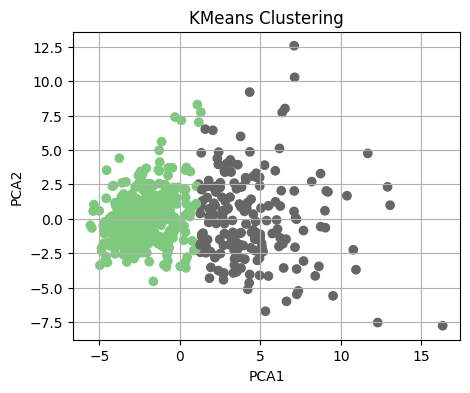

In [ ]:

kmeans_labels = kmeans.fit_predict(X_scaled)

# 평가
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("KMeans Adjusted Rand Index:", adjusted_rand_score(y, kmeans_labels))

# 시각화
plt.figure(figsize=(5,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Accent')
plt.title("KMeans Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()


#### 5개의 샘플, 각 샘플은 **5개의 피처(feature)**를 가지고 있으며, **클러스터 수 𝑘=2**인 상황을 실제 예제 수치로 K-평균 알고리즘 처리 과정  

 예제 샘플

| 샘플 | 피처1 | 피처2 | 피처3 | 피처4 | 피처5 |
| -- | --- | --- | --- | --- | --- |
| x₁ | 1   | 1   | 1   | 1   | 1   |
| x₂ | 2   | 2   | 2   | 2   | 2   |
| x₃ | 8   | 8   | 8   | 8   | 8   |
| x₄ | 9   | 9   | 9   | 9   | 9   |
| x₅ | 10  | 10  | 10  | 10  | 10  |

단계별 처리 요약

| 단계          | 내용             | 중심점 or 결과                                          |
| ----------- | -------------- | -------------------------------------------------- |
| ① 데이터 준비    | 총 5개 샘플, 각 5차원 | x₁\~x₅                                             |
| ② 클러스터 수 설정 | k = 2          | -                                                  |
| ③ 초기 중심점 설정 | 무작위로 x₁, x₄ 선택 | c₁ = x₁ = \[1,1,1,1,1] <br> c₂ = x₄ = \[9,9,9,9,9] |


④ 각 샘플에 클러스터 할당 (1차)  
유클리디안 거리:  $d(x, c) = \sqrt{ \sum_{i=1}^{5} (x_i - c_i)^2 }$

| 샘플 | c₁ 거리 (x₁=\[1,...])  | c₂ 거리 (x₄=\[9,...])  | 더 가까운 중심 | 클러스터 |
| -- | -------------------- | -------------------- | -------- | ---- |
| x₁ | 0                    | √(5×8²)=√320 ≈ 17.89 | c₁       | 0    |
| x₂ | √(5×1²)=√5 ≈ 2.24    | √(5×7²)=√245 ≈ 15.65 | c₁       | 0    |
| x₃ | √(5×7²)=√245 ≈ 15.65 | √(5×1²)=√5 ≈ 2.24    | c₂       | 1    |
| x₄ | √(5×8²)=√320 ≈ 17.89 | 0                    | c₂       | 1    |
| x₅ | √(5×9²)=√405 ≈ 20.12 | √(5×1²)=√5 ≈ 2.24    | c₂       | 1    |

※  1차 클러스터 할당 결과:   
    클러스터 0: x₁, x₂  
    클러스터 1: x₃, x₄, x₅   

 ⑤ 클러스터 중심점 재계산  
 - 클러스터 0: 평균([x₁, x₂])
 c1′​= [1,1,1,1,1]+[2,2,2,2,2] / 2 = [1.5, 1.5, 1.5,1.5,1.5]
 - 클러스터 1: 평균([x₃, x₄, x₅])
 c2′​= [8,8,8,8,8] + [9,9,9,9,9] + [10,10,10,10,10] /3 =  [9,9,9,9,9]



⑥ 재할당 (2차)  

| 샘플 | c₁' 거리 (\[1.5,...])    | c₂' 거리 (\[9,...]) | 클러스터 |
| -- | ---------------------- | ----------------- | ---- |
| x₁ | √(5×0.5²)=√1.25 ≈ 1.12 | ≈ 17.89           | 0    |
| x₂ | √(5×0.5²)=√1.25 ≈ 1.12 | ≈ 15.65           | 0    |
| x₃ | ≈ 15.65                | ≈ 2.24            | 1    |
| x₄ | ≈ 17.89                | 0                 | 1    |
| x₅ | ≈ 20.12                | ≈ 2.24            | 1    |

※ 결과 동일 → 수렴!


NumPy 기반 K-평균 구현 (5샘플, 5차원, k=2)

| 단계                            | 내용                                 |
| ----------------------------- | ---------------------------------- |
| `np.linalg.norm(..., axis=2)` | 모든 샘플과 중심점 사이의 유클리디안 거리 계산         |
| `argmin(..., axis=1)`         | 각 샘플이 가장 가까운 중심점의 인덱스를 클러스터 라벨로 설정 |
| 중심점 갱신                        | 같은 클러스터에 속한 샘플들의 평균을 새 중심점으로 계산    |
| `np.allclose`                 | 중심점이 더 이상 바뀌지 않으면 반복 종료 (수렴)       |


In [ ]:
import numpy as np

# 1. 데이터 정의 (5샘플, 5차원)
X = np.array([
    [1, 1, 1, 1, 1],    # x1
    [2, 2, 2, 2, 2],    # x2
    [8, 8, 8, 8, 8],    # x3
    [9, 9, 9, 9, 9],    # x4
    [10,10,10,10,10],   # x5
])

n_samples, n_features = X.shape
k = 2  # 클러스터 수

# 2. 초기 중심점 (샘플 중 무작위 2개 선택)
np.random.seed(42)
init_indices = np.random.choice(n_samples, k, replace=False)
centroids = X[init_indices]6
print(f"초기 중심점:\n{centroids}\n"\

# 3. 클러스터 반복
for iteration in range(10):  # 최대 10번 반복
    # 3.1 각 샘플과 중심점 사이 거리 계산
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)  # (5,2) 거리행렬
    labels = np.argmin(distances, axis=1)

    # 3.2 새로운 중심점 계산
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    print(f"반복 {iteration+1}:")
    print(f"할당된 클러스터: {labels}")
    print(f"새 중심점:\n{new_centroids}\n")

    # 수렴 조건: 중심점 변화 없음
    if np.allclose(centroids, new_centroids):
        print("수렴 완료!")
        break

    centroids = new_centroids


초기 중심점:
[[ 2  2  2  2  2]
 [10 10 10 10 10]]

반복 1:
할당된 클러스터: [0 0 1 1 1]
새 중심점:
[[1.5 1.5 1.5 1.5 1.5]
 [9.  9.  9.  9.  9. ]]

반복 2:
할당된 클러스터: [0 0 1 1 1]
새 중심점:
[[1.5 1.5 1.5 1.5 1.5]
 [9.  9.  9.  9.  9. ]]

수렴 완료!


전체 소스

KMeans Silhouette Score: 0.3447344346611054
KMeans Adjusted Rand Index: 0.676504895633523


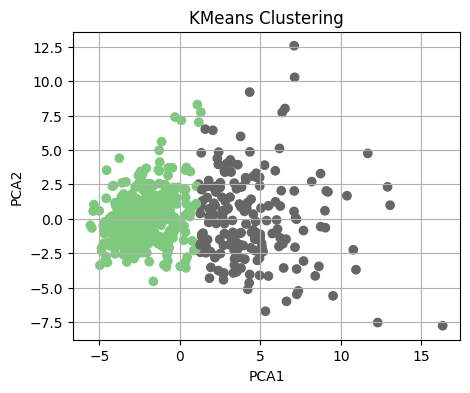

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# 데이터 불러오기
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 정답 라벨 (평가용)

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시각화를 위한 차원 축소 (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 평가
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("KMeans Adjusted Rand Index:", adjusted_rand_score(y, kmeans_labels))

# 시각화
plt.figure(figsize=(5,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Accent')
plt.title("KMeans Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()


### 2_2. DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 클러스터링

밀도 기반의 비지도 학습 알고리즘으로, 데이터의 밀도를 기준으로 군집을 형성하고 **이상치(Noise)**를 구분한다.

- DBSCAN 처리 과정

| 단계                   | 설명                                          |
| -------------------- | ------------------------------------------- |
| ① 파라미터 설정            | 반경 `eps`, 최소 이웃 수 `min_samples` 지정          |
| ② 핵심점(Core point) 판단 | 해당 점 주변 `eps` 이내에 `min_samples` 이상 존재하면 핵심점 |
| ③ 밀도 확장              | 핵심점과 연결된 점들을 같은 군집으로 확장                     |
| ④ 경계점 처리             | 핵심점 주변에는 있지만 핵심은 아닌 점을 포함                   |
| ⑤ 이상치 분리             | 어느 군집에도 속하지 않은 점은 `Noise(-1)`로 분류           |


- DBSCAN 장단점

| 장점                 | 단점                          |
| ------------------ | --------------------------- |
| 군집 수 **사전 지정 불필요** | `eps`, `min_samples` 튜닝 어려움 |
| **이상치 감지** 기능 내장   | 밀도 차 큰 데이터에서 성능 저하          |
| 비구형 군집도 잘 탐지       | 고차원 데이터에선 거리 기반 한계          |



[sklearn.cluster.DBSCAN 주요 파라미터 ]
- DBSCAN()의 주요 파라미터는 군집의 모양, 크기, 이상치 판단에 큰 영향을 주며, 특히 eps와 min_samples는 핵심이다.

| 파라미터              | 기본값           | 설명                                                            |
| ----------------- | ------------- | ------------------------------------------------------------- |
| **`eps`**         | 0.5           | **이웃 반경**: 한 점의 이웃으로 간주되는 최대 거리. 군집의 밀도 기준 결정.                |
| **`min_samples`** | 5             | **핵심점이 되기 위한 최소 이웃 수** (본인 포함)                                |
| `metric`          | `'euclidean'` | 거리 측정 방식 (`'manhattan'`, `'cosine'`, `'minkowski'` 등 가능)      |
| `metric_params`   | None          | 거리 함수에 필요한 추가 파라미터 (예: `p=1` for Manhattan)                   |
| `algorithm`       | `'auto'`      | 근접 이웃 탐색 방식 (`'ball_tree'`, `'kd_tree'`, `'brute'`, `'auto'`) |
| `leaf_size`       | 30            | `ball_tree` 또는 `kd_tree` 사용 시 트리의 리프 크기                       |
| `p`               | 2             | `minkowski` 거리일 때 거리의 차수 (`p=2` → 유클리디안, `p=1` → 맨해튼)         |
| `n_jobs`          | None          | 병렬 처리에 사용할 CPU 코어 수. `-1`이면 모든 코어 사용                          |


 eps: 반경 거리
- 각 데이터 포인트에서 이 반경 내에 있는 점들만 이웃으로 간주
- 군집의 밀도 기준이 됨
- 너무 작으면 군집이 너무 많이 생기고 대부분 noise
- 너무 크면 서로 다른 군집이 병합됨

metric: 거리 함수

| 값             | 의미                   |
| ------------- | -------------------- |
| `'euclidean'` | 유클리디안 거리 (기본값)       |
| `'manhattan'` | 택시 거리 (절댓값의 합)       |
| `'cosine'`    | 방향 기반 거리             |
| `'minkowski'` | 일반화된 거리 함수 (p 사용 가능) |

파라미터 선택 팁

| 목적          | 설정 예시                                                        |
| ----------- | ------------------------------------------------------------ |
| 고밀도 영역만 탐지  | 작은 `eps`, 큰 `min_samples`                                    |
| 희소한 이상치 탐지  | `eps`를 조금 키움                                                 |
| 차원이 많을 때    | `metric='cosine'` 또는 `manhattan` 고려                          |
| 자동 `eps` 추천 | `sklearn.neighbors.NearestNeighbors` + k-distance plot 사용 가능 |


In [ ]:
# DBSCAN 모델 학습
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

dbscan.fit(X_scaled)
print(dir(dbscan))



['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'algorithm', 'components_', 'core_sample_indices_', 'eps', 'fit', 'fit_predict', 'get_metadata_routing', 'get_params', 'labels_', 'leaf_size', 'metric', 'metr

DBSCAN 모델도 .fit() 또는 .fit_predict()를 호출한 후, 학습된 객체에서 다양한 **속성(attributes)**을 통해 결과를 확인할 수 있습니다.

다만, KMeans와는 달리 DBSCAN은 중심점 중심의 모델이 아니기 때문에, 중심 관련 속성은 존재하지 않는다. 따라서 .cluster_centers_, .inertia_ 등의 속성은 존재하지 않는다.

| 속성명                         | 설명                          | 타입                                             |활용 예|
| --------------------------- | --------------------------- | ---------------------------------------------- |--|
| **`.labels_`**              | 각 데이터 포인트의 군집 레이블 (-1은 이상치) | array, shape = (n\_samples,)                   |시각화, 군집 수 계산|
| **`.core_sample_indices_`** | 핵심점(core point)의 인덱스 리스트    | array   |핵심/경계/이상치 분석|                                       |
| **`.components_`**          | 핵심점(core samples)들의 데이터 좌표  | array, shape = (n\_core\_samples, n\_features) |시각화 또는 추출|
| **`.n_features_in_`**       | 입력 특성(feature)의 수 (v1.0 이상) | int                                            |모델 구조 확인용|
| **`.feature_names_in_`**    | 피처 이름 (입력이 DataFrame일 경우)   | array                                          |해석 시 편리|


.labels_: 각 샘플의 군집 번호

In [ ]:
print(dbscan.labels_[:10])
# 예: [ 0  0  0  0 -1  1  1  1  1  1]
# → -1은 Noise (이상치)


unique, counts = np.unique(dbscan.labels_, return_counts=True)

for label, count in zip(unique, counts):
    print(f"클러스터 {label}: {count}개")


[-1 -1 -1 -1 -1 -1  0 -1 -1 -1]
클러스터 -1: 371개
클러스터 0: 12개
클러스터 1: 181개
클러스터 2: 3개
클러스터 3: 2개


.core_sample_indices_: 핵심점 인덱스


In [ ]:
print(len(dbscan.core_sample_indices_))  # 핵심점의 개수
print(dbscan.core_sample_indices_[:5])


136
[ 6 40 48 49 50]


.components_: 핵심점 좌표

In [ ]:
print(dbscan.components_.shape)
# → (핵심점 개수, 피처 개수)


(136, 30)


.n_features_in_ (v1.0+)

In [ ]:
print(dbscan.n_features_in_)
# → 30 (유방암 데이터셋의 특성 수)


30


.feature_names_in_ (DataFrame 사용 시)

In [ ]:
import pandas as pd

X_df = pd.DataFrame(data.data, columns=data.feature_names)
X_scaled_df = pd.DataFrame(scaler.fit_transform(X_df), columns=X_df.columns)

dbscan = DBSCAN(eps=1.5)
dbscan.fit(X_scaled_df)

print(dbscan.feature_names_in_[:5])


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


평가 지표

In [ ]:


# -1은 noise (이상치)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print("Estimated number of clusters:", n_clusters)
print("Estimated number of noise points:", n_noise)

# 평가지표
if len(set(dbscan_labels)) > 1:
    print("Silhouette Score:", silhouette_score(X_scaled, dbscan_labels))
    print("Adjusted Rand Index:", adjusted_rand_score(y, dbscan_labels))
else:
    print("군집이 하나뿐이거나 모두 Noise입니다.")


Estimated number of clusters: 4
Estimated number of noise points: 371
Silhouette Score: -0.19851389887763776
Adjusted Rand Index: 0.09635079487159537


시각화

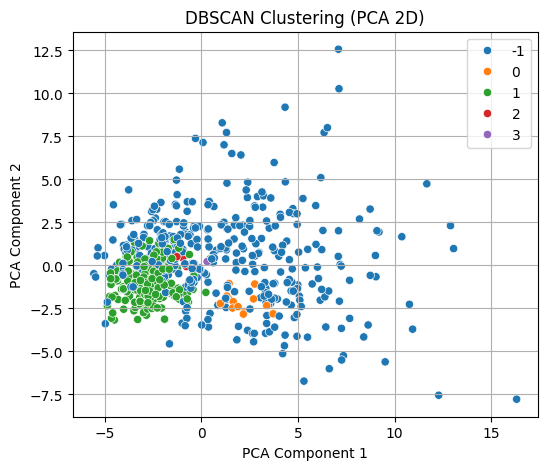

In [ ]:
plt.figure(figsize=(6,5))
palette = sns.color_palette('tab10', len(set(dbscan_labels)))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dbscan_labels, palette=palette, legend='full')
plt.title("DBSCAN Clustering (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

### 3. 계층적 군집 (Agglomerative)

Agglomerative Silhouette Score: 0.33938477753669855
Agglomerative Adjusted Rand Index: 0.5750409366326297


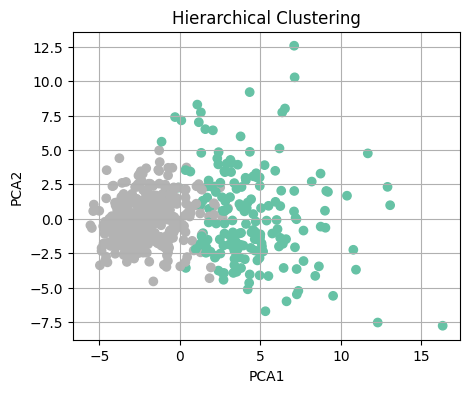

In [ ]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)

print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agg_labels))
print("Agglomerative Adjusted Rand Index:", adjusted_rand_score(y, agg_labels))

plt.figure(figsize=(5,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='Set2')
plt.title("Hierarchical Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()